In [3]:
import gooseberry as gs

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import jax
import jax.numpy as jnp

from tools import BlindColours, zero_balanced_weights
from lambda_balanced import QQT_lambda_balanced3
from balanced_weights import balanced_weights
from empiricalTest import LinearNetwork, get_random_regression_task


In [4]:
bc = BlindColours()
blind_colours = bc.get_colours()
div_cmap = bc.get_div_cmap()

In [29]:
def get_lambda_balanced(lmda, in_dim, hidden_dim, out_dim):
    #generates ranodm lambda balanced weights assuming in_dim == out_dim

    sgn = np.sign(lmda)
    init_w1, init_w2, _, q = balanced_weights(in_dim, hidden_dim, out_dim)
    while (np.sign(q[0][0]) != sgn):
        init_w1, init_w2, _, q = balanced_weights(in_dim, hidden_dim, out_dim)
    
    factor = np.sqrt(lmda / q[0][0])

    init_w1 = init_w1 * factor 
    init_w2 = init_w2 * factor 

    return init_w1, init_w2

In [109]:
np.random.seed(1)

in_dim = 8
hidden_dim = 14 
out_dim = 8

learning_rate = 0.05
training_steps = 2000

X = np.eye(8)
Y = np.asarray([
            [1.,  1.,  1., -0.,  1., -0., -0., -0.],
            [1.,  1.,  1., -0., -1., -0., -0., -0.],
            [1.,  1., -1., -0., -0.,  1., -0., -0.],
            [1.,  1., -1., -0., -0., -1., -0., -0.],
            [1., -1., -0.,  1., -0., -0.,  1., -0.],
            [1., -1., -0.,  1., -0., -0., -1., -0.],
            [1., -1., -0., -1., -0., -0., -0.,  1.],
            [1., -1., -0., -1., -0., -0., -0., -1.]
        ])



ws = dict()


w1w1s = dict()


w2w2s = dict()


losses = dict()

sigma_small = 0.0001
sigma_big = 0.42

initial_weight_pairs = {}

init_w1_gaussian_small = np.random.normal(loc=0.0, scale = sigma_small, size=(hidden_dim, in_dim))
init_w2_gaussian_small = np.random.normal(loc=0.0, scale = sigma_small, size=(out_dim, hidden_dim))
initial_weight_pairs['Gaussian Small'] = (init_w1_gaussian_small, init_w2_gaussian_small)

init_w1_gaussian_large = np.random.normal(loc=0.0, scale =  sigma_big, size=(hidden_dim, in_dim))
init_w2_gaussian_large = np.random.normal(loc=0.0, scale = sigma_big, size=(out_dim, hidden_dim))
initial_weight_pairs['Gaussian Large'] = (init_w1_gaussian_large, init_w2_gaussian_large)


init_w1_balanced, init_w2_balanced = zero_balanced_weights(in_dim, hidden_dim, out_dim, sigma=sigma_big)
initial_weight_pairs['0 Balanced'] = (init_w1_balanced, init_w2_balanced)

init_w1_100_balanced, init_w2_100_balanced = get_lambda_balanced(10, in_dim, hidden_dim, out_dim)
initial_weight_pairs['10 Balanced'] = (init_w1_100_balanced, init_w2_100_balanced)

init_w1_100_neg_balanced, init_w2_100_neg_balanced = get_lambda_balanced(-10, in_dim, hidden_dim, out_dim)
initial_weight_pairs['-10 balanced'] = (init_w1_100_neg_balanced, init_w2_100_neg_balanced)

init_w1_5_balanced, init_w2_5_balanced = get_lambda_balanced(5, in_dim, hidden_dim, out_dim)
initial_weight_pairs['5 Balanced'] = (init_w1_5_balanced, init_w2_5_balanced)

init_w1_2_balanced, init_w2_2_balanced = get_lambda_balanced(2, in_dim, hidden_dim, out_dim)
initial_weight_pairs['2 Balanced'] = (init_w1_2_balanced, init_w2_2_balanced)

init_w1_20_balanced, init_w2_20_balanced = get_lambda_balanced(20, in_dim, hidden_dim, out_dim)
initial_weight_pairs['20 Balanced'] = (init_w1_20_balanced, init_w2_20_balanced)


init_w1_100_neg_balanced, init_w2_100_neg_balanced = get_lambda_balanced(-10, in_dim, hidden_dim, out_dim)
initial_weight_pairs['-10 balanced'] = (init_w1_100_neg_balanced, init_w2_100_neg_balanced)



for weight_init in initial_weight_pairs.keys():
    init_w1, init_w2 = initial_weight_pairs[weight_init]
    model = LinearNetwork(in_dim, hidden_dim, out_dim, init_w1.copy(), init_w2.copy())
    w1s, w2s, _ = model.train(X, Y, training_steps, learning_rate)

    ws[weight_init] = [w2 @ w1 for (w1, w2) in zip(w1s, w2s)]
    w1w1s[weight_init] = [w1.T @ w1 for w1 in w1s]
    w2w2s[weight_init] = [w2 @ w2.T for w2 in w2s]
    losses[weight_init] = [1/(2*8) * np.linalg.norm(w2 @ w1 @ X - Y)**2 for (w1, w2) in zip(w1s, w2s)]





"""
THIS IS JUST EMPIRICAL 

Initialise weights with the attributes:

1. Gaussan Small
2. Gaussian Large
3. 0 Balanced
4. Lambda very big negative
5. Lambda very big positive
"""

##Show all the graphs as in the paper


/Users/nicolasanguita/Desktop/JMC/Year4/Thesis/ExactLearningDynamics/empiricalTest.py:208: RuntimeWarning: overflow encountered in square
  loss = np.mean((self.forward(X_train) - Y_train) ** 2)
/Users/nicolasanguita/Desktop/JMC/Year4/Thesis/ExactLearningDynamics/empiricalTest.py:185: RuntimeWarning: overflow encountered in matmul
  dW1 = 1/x.shape[1] * self.W2.T @ (forward-y) @ x.T
/Users/nicolasanguita/Desktop/JMC/Year4/Thesis/ExactLearningDynamics/empiricalTest.py:185: RuntimeWarning: invalid value encountered in matmul
  dW1 = 1/x.shape[1] * self.W2.T @ (forward-y) @ x.T
/Users/nicolasanguita/Desktop/JMC/Year4/Thesis/ExactLearningDynamics/empiricalTest.py:186: RuntimeWarning: overflow encountered in matmul
  dW2 = 1/x.shape[1] * (forward - y) @ x.T @ self.W1.T


'\nTHIS IS JUST EMPIRICAL \n\nInitialise weights with the attributes:\n\n1. Gaussan Small\n2. Gaussian Large\n3. 0 Balanced\n4. Lambda very big negative\n5. Lambda very big positive\n'

In [68]:
def arange_svd(Y, u, vt):
    sort = np.sign(np.abs(np.round(Y.T @ vt.T)))
    idxs = np.where(sort == 1)[1]
    u = u @ sort.T
    sgn = np.diag(np.sign(np.sum(u, axis=0)))
    u = sgn.T @ u
    vt = sort @ vt
    vt = sgn @ vt
    return u, vt



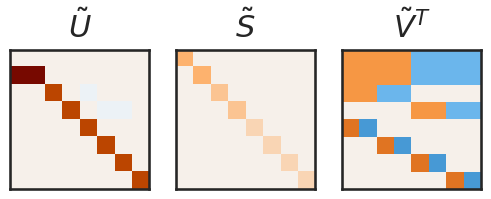

In [69]:
sigma_yx = 1./8. * Y.T @ X
U, S, VT = np.linalg.svd(sigma_yx, False)
U, VT = arange_svd(Y, U, VT)

max_val = np.max([U, np.diag(S), VT]) * 1.05

fig, axs = plt.subplots(1, 3, figsize=(5.25, 2.5))
axs[0].imshow(U, cmap=div_cmap, vmin=-max_val, vmax=max_val)
axs[1].imshow(np.diag(S), cmap=div_cmap, vmin=-max_val, vmax=max_val)
axs[2].imshow(VT, cmap=div_cmap, vmin=-max_val, vmax=max_val)
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
axs[0].set_title("$\\tilde{U}$", pad=9., fontsize=22)
axs[1].set_title("$\\tilde{S}$", pad=9., fontsize=22)
axs[2].set_title("$\\tilde{V}^T$", pad=9., fontsize=22)

fig.tight_layout()
fig.savefig("./figures/figure-3_b-top.svg")

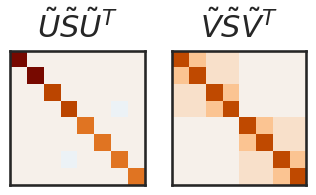

In [70]:
sigma_yx = 1./8. * Y.T @ X
U, S, VT = np.linalg.svd(sigma_yx, False)

max_val = np.max([np.max(U@np.diag(S)@U.T), np.max(VT.T@np.diag(S)@VT)]) * 1.05

fig, axs = plt.subplots(1, 2, figsize=(3.5, 2.5))
axs[0].imshow(U@np.diag(S)@U.T, cmap=div_cmap, vmin=-max_val, vmax=max_val)
axs[1].imshow(VT.T@np.diag(S)@VT, cmap=div_cmap, vmin=-max_val, vmax=max_val)
for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
axs[0].set_title("$\\tilde{U}\\tilde{S}\\tilde{U}^T$", pad=9., fontsize=22)
axs[1].set_title("$\\tilde{V}\\tilde{S}\\tilde{V}^T$", pad=9., fontsize=22)

fig.tight_layout()
fig.savefig("./figures/figure-3_b-bottom.svg")

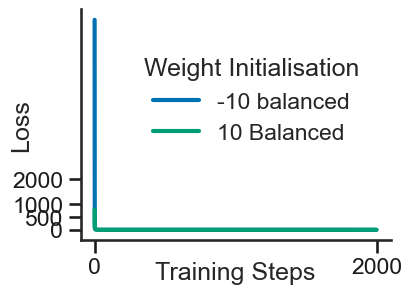

In [88]:
of_interest = ['-10 balanced', '10 Balanced']

labels = of_interest
colours = [blind_colours[i+1] for i in range(len(labels))]
fig, ax = plt.subplots(figsize=(4., 3.))
for i, init in enumerate(of_interest):
    ax.plot(losses[init], lw=3., color=colours[i], label=init)
ax.legend(loc=(.175, 0.38), title="Weight Initialisation", frameon=False)
ax.set_xlabel("Training Steps", labelpad=-12)
ax.set_ylabel("Loss", labelpad=-15)
ax.set_xticks([0, 2000])
ax.set_yticks([0, 500, 1000, 2000])
sns.despine()
fig.savefig("./figures/figure-3_f.svg")

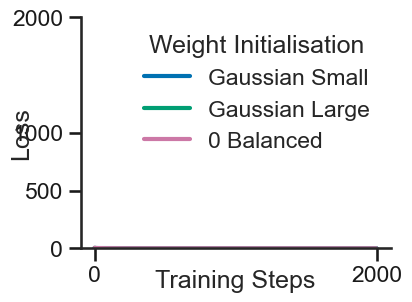

In [101]:
of_interest = ['Gaussian Small', 'Gaussian Large', '0 Balanced']

labels = of_interest
colours = [blind_colours[i+1] for i in range(len(labels))]
fig, ax = plt.subplots(figsize=(4., 3.))
for i, init in enumerate(of_interest):
    ax.plot(losses[init], lw=3., color=colours[i], label=init)
ax.legend(loc=(.175, 0.38), title="Weight Initialisation", frameon=False)
ax.set_xlabel("Training Steps", labelpad=-12)
ax.set_ylabel("Loss", labelpad=-15)
ax.set_xticks([0, 2000])
ax.set_yticks([0, 500, 1000, 2000])
sns.despine()
fig.savefig("./figures/figure-3_f.svg")

In [78]:
losses.keys()

dict_keys(['Gaussian Small', 'Gaussian Large', '0 Balanced', '10 Balanced', '-10 balanced'])

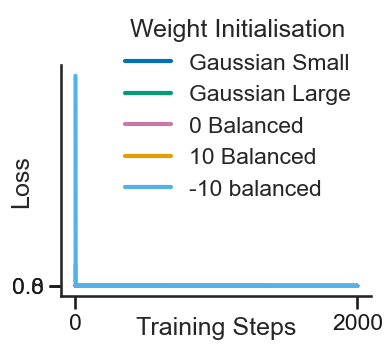

In [89]:


labels = initial_weight_pairs.keys()
colours = [blind_colours[i+1] for i in range(len(labels))]
fig, ax = plt.subplots(figsize=(4., 3.))
for i, init in enumerate(initial_weight_pairs.keys()):
    ax.plot(losses[init], lw=3., color=colours[i], label=init)
ax.legend(loc=(.175, 0.38), title="Weight Initialisation", frameon=False)
ax.set_xlabel("Training Steps", labelpad=-12)
ax.set_ylabel("Loss", labelpad=-15)
ax.set_xticks([0, 2000])
ax.set_yticks([0, 0.8])
sns.despine()
fig.savefig("./figures/figure-3_f.svg")

In [72]:
for i, k in enumerate(initial_weight_pairs.keys()):
    print(losses[k])
    print(i, k)

[1.999999999384264, 1.9999999938767188, 1.9999999883559585, 1.9999999828178021, 1.999999977258047, 1.999999971672465, 1.9999999660567995, 1.9999999604067604, 1.9999999547180203, 1.9999999489862081, 1.9999999432069089, 1.999999937375656, 1.9999999314879293, 1.999999925539148, 1.9999999195246692, 1.9999999134397808, 1.999999907279699, 1.9999999010395608, 1.9999998947144222, 1.9999998882992507, 1.999999881788924, 1.9999998751782195, 1.9999998684618139, 1.9999998616342758, 1.9999998546900586, 1.9999998476234997, 1.9999998404288095, 1.9999998331000697, 1.9999998256312244, 1.9999998180160754, 1.9999998102482763, 1.9999998023213232, 1.9999997942285528, 1.9999997859631304, 1.9999997775180476, 1.999999768886112, 1.99999976005994, 1.999999751031951, 1.9999997417943578, 1.999999732339158, 1.99999972265813, 1.9999997127428173, 1.999999702584525, 1.9999996921743093, 1.9999996815029695, 1.9999996705610337, 1.9999996593387548, 1.9999996478260949, 1.999999636012719, 1.9999996238879807, 1.9999996114409

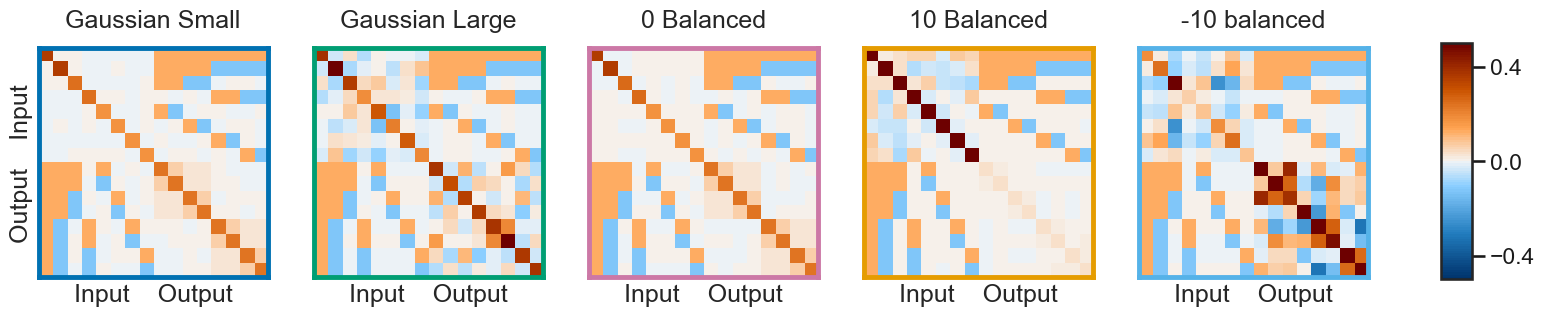

In [73]:
fig, axs = plt.subplots(1, 5, figsize=(11*5/3, 3.5), sharex=True, sharey=True)
for i, label in enumerate(labels):
    qqt = np.vstack([
        np.hstack([w1w1s[label][-1], ws[label][-1].T]),
        np.hstack([ws[label][-1], w2w2s[label][-1]])
    ])
    vals = axs[i].matshow(1./8. * qqt, cmap=div_cmap, vmin=-1./8. * 4, vmax=1./8. * 4)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(label, pad=15.)

for ax in axs:
    ax.set_xlabel("Input    Output")
axs[0].set_ylabel("Output    Input")
    
for ax, c in zip(axs, colours):
    for spine in ax.spines.values():
        spine.set_edgecolor(c)
        spine.set_linewidth(3.5)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.89, 0.1625, 0.017, 0.675])
cbar = fig.colorbar(vals, cax=cbar_ax)
cbar.ax.set_yticks([-0.4, 0., 0.4])
fig.savefig("./figures/figure-3_c-d-e.svg")

<Axes: >

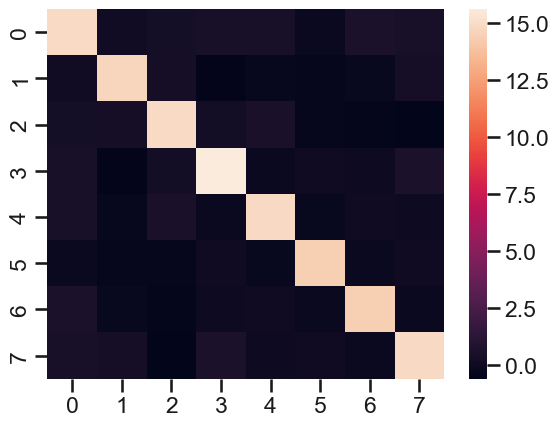

In [98]:
sns.heatmap(w1w1s['10 Balanced'][-1])

<Axes: >

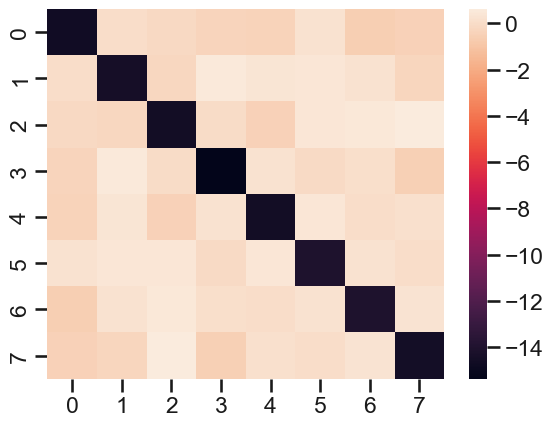

In [100]:
w1 = w1w1s['10 Balanced'][-1]
w2 = w2w2s['10 Balanced'][-1]
sns.heatmap(w2-w1)

<Axes: >

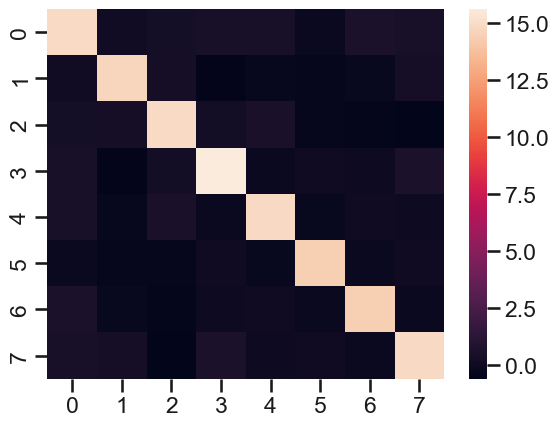

In [92]:
sns.heatmap(w1w1s['10 Balanced'][-1])

<Axes: >

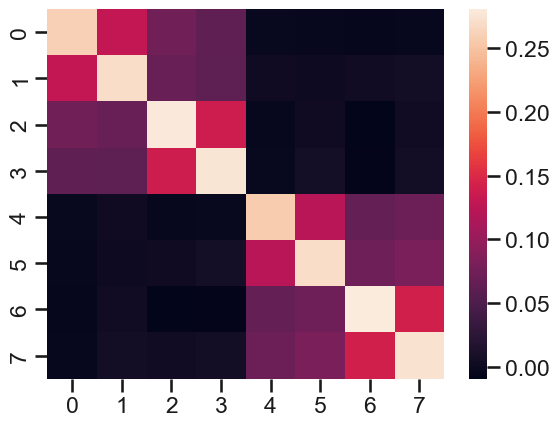

In [93]:
sns.heatmap(w2w2s['10 Balanced'][-1])

<Axes: >

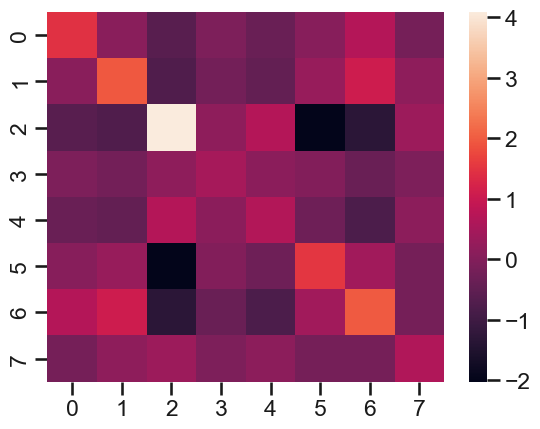

In [94]:
sns.heatmap(w1w1s['-10 balanced'][-1])

<Axes: >

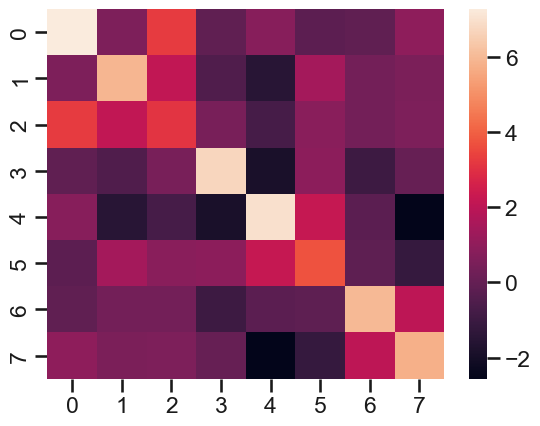

In [95]:
sns.heatmap(w2w2s['-10 balanced'][-1])

In [96]:
np.sum(np.diag(w2w2s['-10 balanced'][-1]))

45.52572005306872

In [97]:
45.5/8

5.6875

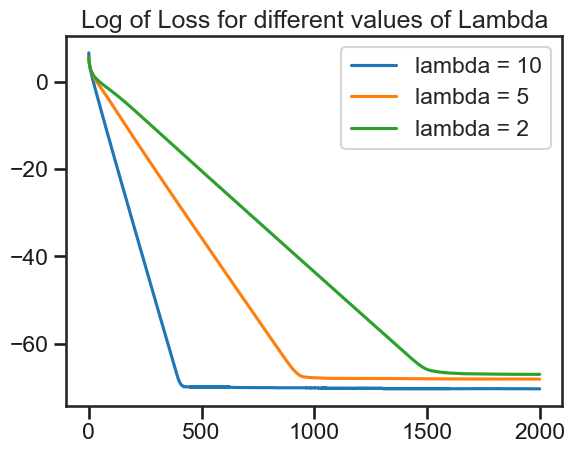

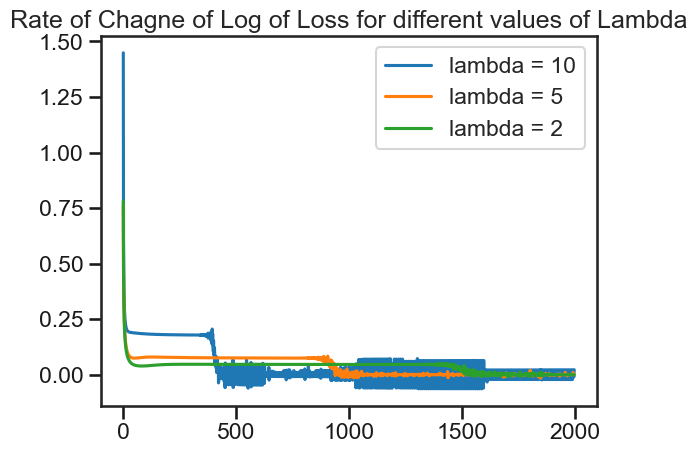

In [124]:


plt.figure()
plt.title('Log of Loss for different values of Lambda')
plt.plot(np.log(losses['10 Balanced']), label = 'lambda = 10')
# plt.plot(np.log(losses['20 Balanced']), label = 'lambda = 20')
plt.plot(np.log(losses['5 Balanced']), label = 'lambda = 5')
plt.plot(np.log(losses['2 Balanced']), label = 'lambda = 2')
plt.legend()

plt.figure()
plt.title('Rate of Chagne of Log of Loss for different values of Lambda')
plt.plot(-np.diff(np.log(losses['10 Balanced'])), label = 'lambda = 10')
# plt.plot(np.log(losses['20 Balanced']), label = 'lambda = 20')
plt.plot(-np.diff(np.log(losses['5 Balanced'])), label = 'lambda = 5')
plt.plot(-np.diff(np.log(losses['2 Balanced'])), label = 'lambda = 2')
plt.legend()


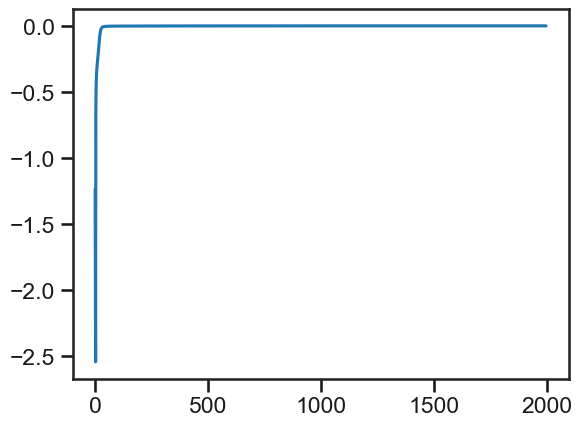

In [116]:
plt.plot(np.diff(np.log(losses['20 Balanced'])))

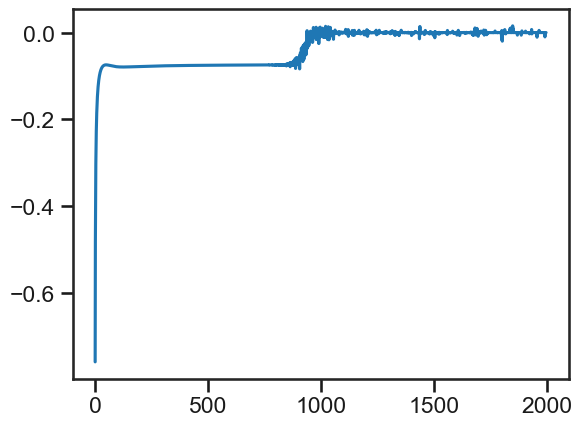

In [115]:
plt.plot(np.diff(np.log(losses['5 Balanced'])))

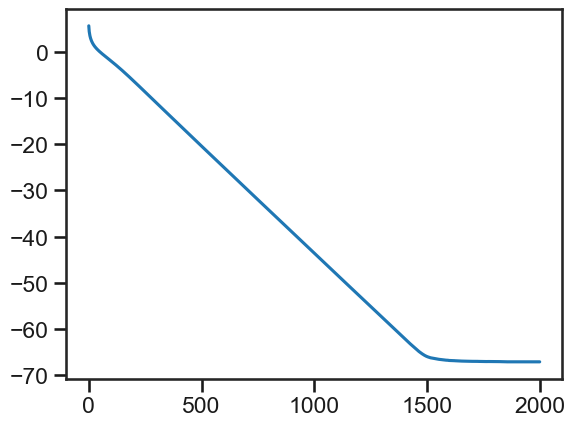

In [114]:
plt.plot(np.log(losses['2 Balanced']))